In [1]:
# importing the necessary libraries
#for mathematical computationimport numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import plotly 
#import plotly.express as px
#% matplotlib inline

df = pd.read_csv('songs_normalize.csv')

In [6]:
print(df.head(5))

           artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0

In [7]:
#data info
df.info()#Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [5]:
#artists sorted from most to least popular (popularity in relation to artist)
df_popularArtists = df.groupby('artist').sum().sort_values('popularity', ascending=False)
df_popularArtists = df_popularArtists.reset_index()
df_popularArtists

,artist,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Rihanna,5887298,8,50247,1803,16.482,16.844,123,-137.276,14,1.9983,3.811065,0.153460,3.7089,13.0940,3128.082
1,Eminem,5939050,20,42123,1519,15.603,16.374,113,-83.568,9,4.6724,2.212270,0.001437,4.0052,11.4526,2360.762
2,Drake,5337202,18,46334,1424,16.859,13.767,120,-164.954,15,3.7478,1.995427,0.100460,3.8368,10.3514,2812.323
3,Calvin Harris,4546171,1,40269,1356,13.719,17.429,118,-77.276,6,1.1381,1.559682,1.041232,4.3994,12.3440,2502.882
4,Britney Spears,4149701,1,38095,1198,13.457,14.198,113,-104.603,9,1.3786,4.452690,0.028039,2.8750,12.9200,2162.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,Silentó,185131,0,2015,0,0.819,0.768,8,-8.522,1,0.1340,0.234000,0.000000,0.3340,0.9640,139.982
831,Storm Queen,150400,0,2014,0,0.832,0.815,0,-8.035,0,0.0810,0.003040,0.005530,0.2630,0.5190,119.995
832,AJR,201160,0,2017,0,0.673,0.637,5,-4.518,1,0.0429,0.137000,0.000000,0.1840,0.6780,123.980
833,The Lumineers,160097,0,2016,0,0.664,0.576,5,-6.429,1,0.0286,0.630000,0.000198,0.0902,0.6210,76.026


In [4]:
df['genre']= df['genre'].astype(str)
df['genre'] = df['genre'].str.replace(" ", "")
df['genre'] = df['genre'].str.split(",", expand = False)
genres = df.explode('genre')        # Split genre combinations
print(genres['genre'].nunique())    # There's a total of 15 genres in the dataset

plt.figure(figsize = (10, 10))
ax = fig.subplots()
genres.genre.value_counts()[:10].plot(ax=ax, kind = "pie")
ax.set_ylabel("")
ax.set_title("Top 10 most popular genres")
plt.show()

15


NameError: name 'fig' is not defined

<Figure size 1000x1000 with 0 Axes>

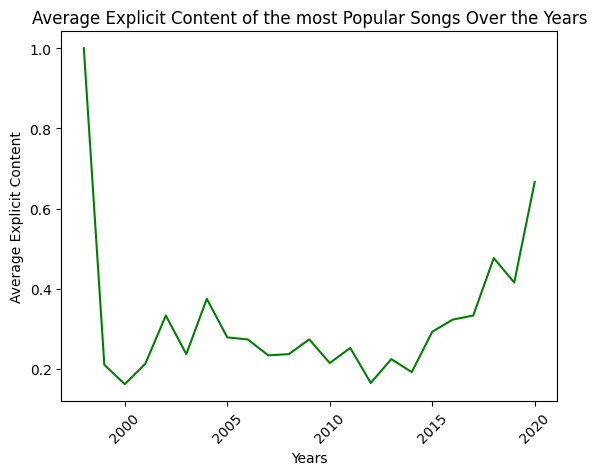

In [10]:
# Grouping the data by 'years' and calculating the average explicit content for each year
explicit_content_by_year = df.groupby('year')['explicit'].mean().reset_index()

# Sorting the data by 'years' in ascending order
explicit_content_by_year = explicit_content_by_year.sort_values('year', ascending=True)

# Creating the plot
plt.plot(explicit_content_by_year['year'], explicit_content_by_year['explicit'], color  = 'green')
plt.xlabel('Years')
plt.ylabel('Average Explicit Content')
plt.title('Average Explicit Content of the most Popular Songs Over the Years')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 1.0, 'Popularity of Each Mode')

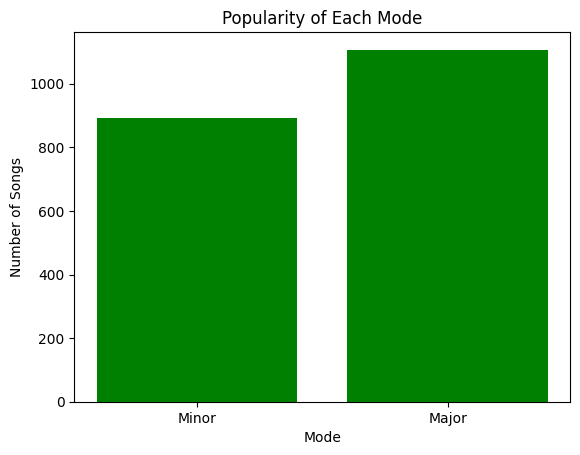

In [11]:
popularityMode = df.groupby('mode').size().reset_index(name='count')
popularityMode['mode'] = popularityMode['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')
plt.bar(popularityMode['mode'], popularityMode['count'], color = 'green')
plt.xlabel('Mode')
plt.ylabel('Number of Songs')
plt.title('Popularity of Each Mode')

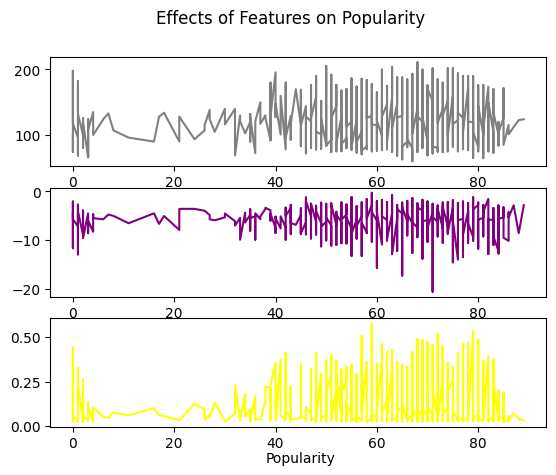

In [66]:
sorted_df = df.sort_values('popularity', ascending = False)
plt.plot(100, 2)
plt.ylabel= 'Popularity'

#Plot tempo
plt.subplot(3, 1, 1)
plt.plot(sorted_df['popularity'], sorted_df['tempo'], color = 'grey')

#plot loudness
plt.subplot(3,1,2)
plt.plot(sorted_df['popularity'], sorted_df['loudness'], color = 'purple')

#plot speechiness
plt.subplot(3,1,3)
#normalize values of speechiness
plt.plot(sorted_df['popularity'], sorted_df['speechiness'], color = 'yellow')

plt.text(45,-0.2,"Popularity", ha="center")
plt.suptitle("Effects of Features on Popularity")
plt.show()

[Text(0.5, 0, 'duration_ms'),
 Text(1.5, 0, 'year'),
 Text(2.5, 0, 'popularity'),
 Text(3.5, 0, 'danceability'),
 Text(4.5, 0, 'energy'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'acousticness'),
 Text(8.5, 0, 'instrumentalness'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo')]

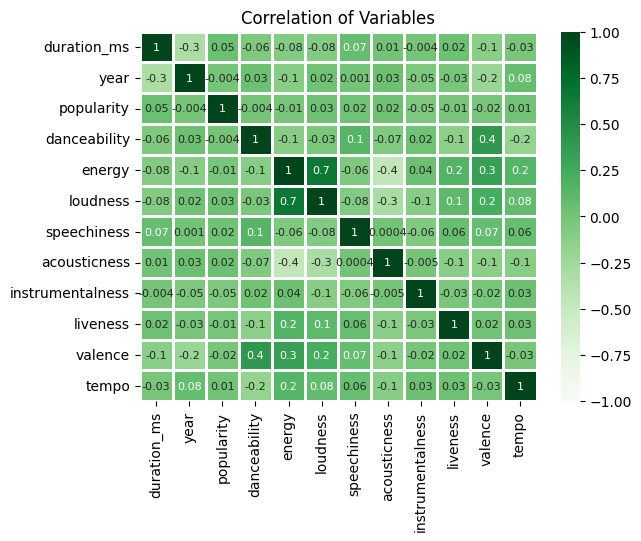

In [104]:
info = df.drop(['key','mode','explicit'], axis=1).corr(method = 'pearson')
map = sns.heatmap(info, annot = True, fmt = '.1g', vmin=-1, vmax=1, center=0, cmap='Greens', linewidths=1, linecolor='White',square = False, annot_kws={"fontsize": 8})
map.set_title('Correlation of Variables')
map.set_xticklabels(map.get_xticklabels(), rotation=90)



<AxesSubplot:title={'center':'Top 20 most popular songs'}, xlabel='Songs', ylabel='Popularity of the Song'>

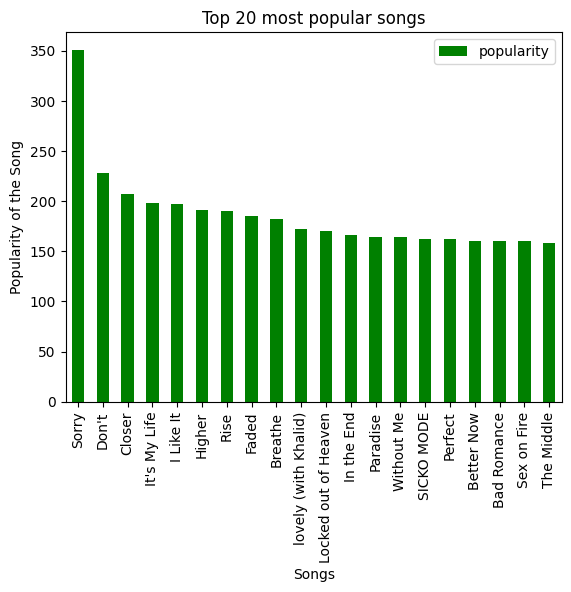

In [4]:
from CustomPlots import topSongs
topSongs(df, 20)

<AxesSubplot:title={'center':'Artists of the Top 10 most popular songs'}, xlabel='Artists', ylabel='Popularity of the Song'>

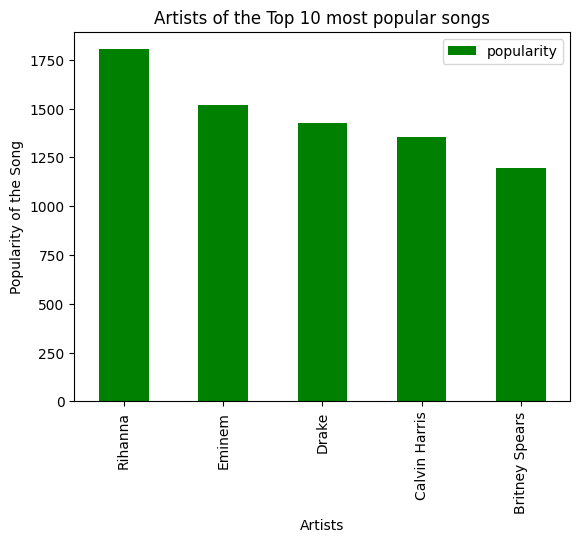

In [2]:
from CustomPlots import topArtists
topArtists(df,5)

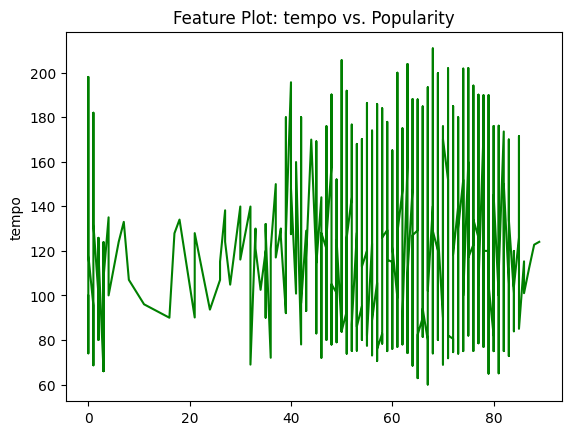

In [3]:
from CustomPlots import featurePlot
#possible features are tempo, loudness, valence, instrumentalness, acousticness, energy, daceability, liveness, speechiness
featurePlot(df, 'tempo')

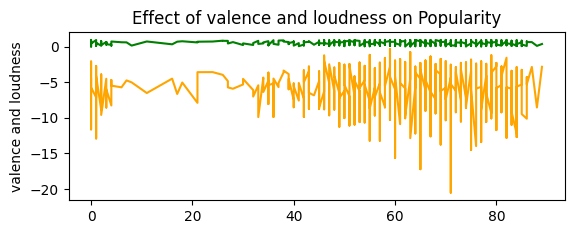

In [3]:
from CustomPlots import featurePlotTwo
featurePlotTwo(df, 'valence', 'loudness')